## Generation of Reaction Rules

## Loading the modules to handle reactions of MicrobeRX

In [1]:
from microberx.RuleGenerator import *

from pprint import pprint

from rdkit.Chem import AllChem

## Getting biotransformation data

MicrobeRX can handle biotransformation from large metabolic network souces. For example, [MetaNetX](https://www.metanetx.org/), [Virtual Metabolic Human (VMH)](https://vmh.life/), [BiGG models](http://bigg.ucsd.edu/), and many others.

Each biotransformation about the chemical reaction, reactant and products must be described in detail. The following cell provides a basic example of the requirements.

In [2]:
mnx_id="MNXR101011"
scheme = "1 MNXM1105732@MNXD1 + 1 MNXM741173@MNXD1 = 1 MNXM4026@MNXD1 + 1 WATER@MNXD1"

compounds_map={
    "MNXM1105732" : "C[C@H]([NH3+])C(=O)[O-]",
    "MNXM741173":"[NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]",
    "MNXM4026":"C[C@H]([NH3+])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-]",
    "WATER" : "[H]O[H]"
}

To analyze and prepare for the generation of reaction rules, the basic information of a biotransformation must be provided into the decompose_reaction function.

The result is a dictionary storing the biotranformation data in more extensive way.

In [13]:
reaction_dict=decompose_reaction(reaction=scheme,compounds_map=compounds_map)

reaction_dict

{'Reaction': '1 MNXM1105732 + 1 MNXM741173 = 1 MNXM4026 + 1 WATER',
 'Reversible': True,
 'LEFT': {'MNXM1105732': {'stoichiometry': 1.0,
   'smiles': 'C[C@H]([NH3+])C(=O)[O-]'},
  'MNXM741173': {'stoichiometry': 1.0,
   'smiles': '[NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]'}},
 'RIGHT': {'MNXM4026': {'stoichiometry': 1.0,
   'smiles': 'C[C@H]([NH3+])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-]'},
  'WATER': {'stoichiometry': 1.0, 'smiles': '[H]O[H]'}},
 'ReactionSmiles': 'C[C@H]([NH3+])C(=O)[O-].[NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]>>C[C@H]([NH3+])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-].[H]O[H]',
 'ReactionNames': 'MNXM1105732.MNXM741173>>MNXM4026.WATER'}

## Loading the biotransformation data into MicrobeRX

The information from the biotransformation can be then used as input for the main class of MicrobreRX.RuleGenerator as follows:

In [4]:
RXN=Reaction(reaction_smiles=reaction_dict['ReactionSmiles'],reaction_ids=reaction_dict['ReactionNames'],reversible=reaction_dict['Reversible'],mapper='RXNMapper')

MicrobeRX's Reaction class includes modules for sanitizing chemical reactions, assigning IDs to all agents, performing automatic atom mapping, and genetare reversible reactions. For more information, see the [documentation of MicrobeRX](https://microberx.readthedocs.io/en/latest/autoapi/microberx/RuleGenerator/index.html) or the function docs.

MicrobeRX provides 2 automatic methods for atom mapping:

- [RXNMapper](https://www.science.org/doi/10.1126/sciadv.abe4166)

- [RTD atom mapping](https://doi.org/10.1093/bioinformatics/btw096)

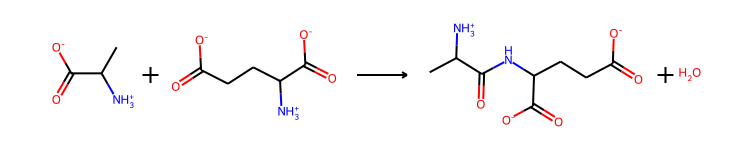

In [5]:
RXN.SanitizedReaction

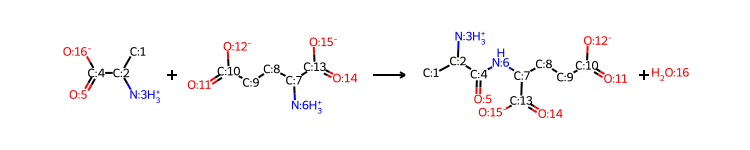

In [6]:
RXN.MappedReaction

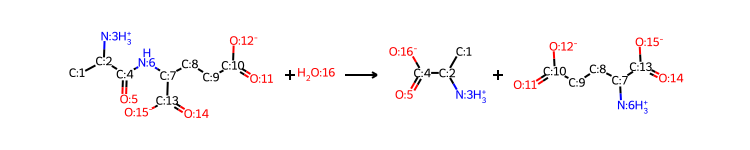

In [7]:
RXN.ReversedReaction

## Single Reactant Reactions

The breakdown of biotransformations into single-reactant reactions (SRR) allows for the independent characterization and understanding of each reactant, with the goal of capturing the most important changes in each metabolic conversion.

To accomplish this, MicrobeRX divides the reactions into SRR while retaining the atom mapping and reaction integrity. 

In [8]:
SRR=generate_single_reactant_reactions(RXN.MappedReaction)
pprint(SRR)

{'reactantIdx_1': {'ID': 'MNXM1105732',
                   'SingleReactantReaction': <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7f7bf23f3240>},
 'reactantIdx_2': {'ID': 'MNXM741173',
                   'SingleReactantReaction': <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7f7bf23f3380>}}


## Reaction Rules

MicrobeRX can generate a series of reaction rules based on the SRRs, allowing them to be used for prediction.

One of the primary goals of the reaction rules is to simplify biotransformations while maintaining chemical accuracy. As a result, in order to reduce unsespecificity, MicrobeRX will add a exhaustive chemical detail description to the atoms in the reaction rules.

Note how all of the atoms retain the atom mapping while also including information about the ring, memebership, aromaticity (if available), charge, and so on.

In [9]:
RULES=generate_rules(SRR['reactantIdx_2']['SingleReactantReaction'])
pprint(RULES)

{'MNXM741173': {'ProductMap': '[CH3:1][CH:2]([NH3+:3])[C:4](=[O:5])[NH:6][CH:7]([CH2:8][CH2:9][C:10](=[O:11])[O-:12])[C:13](=[O:14])[O-:15]',
                'ProductName': 'MNXM4026',
                'ReactantMap': '[NH3+:6][CH:7]([CH2:8][CH2:9][C:10](=[O:11])[O-:12])[C:13](=[O:14])[O-:15]',
                'SingleReactantRules': {2: '[#7&+&!R:6]-[#6&!R:7]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7].[#8&!R:16]',
                                        4: '[#7&+&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13].[#8&!R:16]',
                                        7: '[#7&+&!R:6]-[#6&!R:7](-[#6&!R:8]-[#6&!R:9])-[#6&!R:13](=[#8&!R:14])-[#8&-&!R:15]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7](-[#6&!R:8]-[#6&!R:9])-[#6&!R:13](=[#8&!R:14])-[#8&-&!R:15].[#8&!R:16]',
                                        8: '[#7&+&!R:6]-[#6&!R:7](-[#6&!R:

Reaction rule of 4 atoms in the reactant. 

In [10]:
RULES["MNXM741173"]["SingleReactantRules"][4]

'[#7&+&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13]>>[#6&!R:1]-[#6&!R:2](-[#7&+&!R:3])-[#6&!R:4](=[#8&!R:5])-[#7&!R:6]-[#6&!R:7](-[#6&!R:8])-[#6&!R:13].[#8&!R:16]'

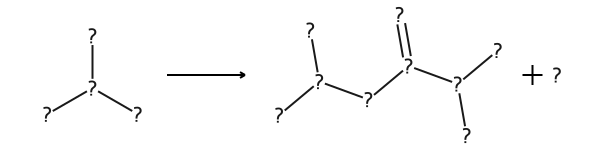

In [11]:
AllChem.ReactionFromSmarts(RULES["MNXM741173"]["SingleReactantRules"][4])

Reaction rule of 10 atoms in the reactant. 

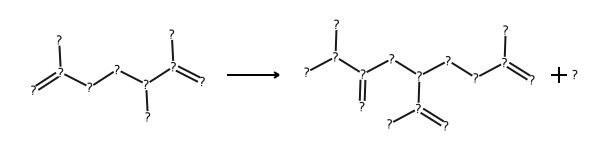

In [12]:
AllChem.ReactionFromSmarts(RULES["MNXM741173"]["SingleReactantRules"][10])